In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [9]:
ndata=pd.read_csv("C:/Users/User/Downloads/results.csv")

In [10]:
ndata.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [12]:
ndata.loc[ndata['home_team']>ndata['away_team'],'winner']=2
ndata.loc[ndata['home_team']<ndata['away_team'],'winner']=0
ndata.loc[ndata['home_team']==ndata['away_team'],'winner']=1

In [13]:
ndata.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,2.0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,0.0
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,2.0
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0.0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,2.0
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,0.0
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,0.0
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,2.0
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,2.0
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,0.0


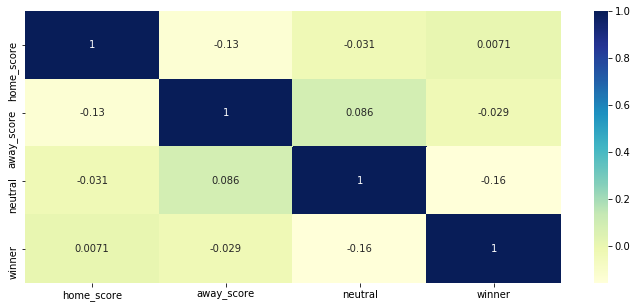

In [14]:
fig, ax = plt.subplots(figsize=(12,5))
sns.heatmap(ndata.corr(),annot = True,cmap="YlGnBu");

In [15]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
colu=['home_team','away_team','neutral','winner']
for col in colu:
    ndata[col] = le.fit_transform(ndata[col])


In [16]:
ndata.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
0,1872-11-30,219,74,0,0,Friendly,Glasgow,Scotland,0,1
1,1873-03-08,75,214,4,2,Friendly,London,England,0,0
2,1874-03-07,219,74,2,1,Friendly,Glasgow,Scotland,0,1
3,1875-03-06,75,214,2,2,Friendly,London,England,0,0
4,1876-03-04,219,74,3,0,Friendly,Glasgow,Scotland,0,1
5,1876-03-25,219,275,4,0,Friendly,Glasgow,Scotland,0,0
6,1877-03-03,75,214,1,3,Friendly,London,England,0,0
7,1877-03-05,278,214,0,2,Friendly,Wrexham,Wales,0,1
8,1878-03-02,219,74,7,2,Friendly,Glasgow,Scotland,0,1
9,1878-03-23,219,275,9,0,Friendly,Glasgow,Scotland,0,0


In [35]:
X = ndata.iloc[:, [1,2,3,4,8]].values
y = ndata.iloc[:, 9].values
from sklearn.metrics import explained_variance_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import train_test_split
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.9468111923367785

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=5,oob_score=True ,random_state =42, min_samples_split=25)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9950844466851525

In [37]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(penalty='l2',C=.00001)
log.fit(X_train,y_train)
y_pred = log.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.9971010839425258